In [7]:
import pandas as pd

In [12]:
parquet_path = "files/shots.parquet"
signal_path = "files/signals.parquet"
source_path = "files/sources.parquet"

## Shot database

In [17]:
shots_df = pd.read_parquet(parquet_path)
shots_df.head()

,shot_id,divertor_config,heating,current_range,plasma_shape,pellets,rmp_coil,preshot_description,postshot_description,comissioner,reference_id,scenario,timestamp,campaign,reference_shot,scenario_id
0,11695,Conventional,None,None,None,0.0,NaN,\n0.1T TF SHOT\n,\nOK\n,None,<NA>,None,2004-12-13 11:54:00,M5,<NA>,NaN
1,11696,Conventional,None,None,None,0.0,NaN,\nSTANDARD 0.3T TF SHOT\n,\nOK\n,None,<NA>,None,2004-12-13 12:07:00,M5,<NA>,NaN
2,11697,Conventional,None,None,None,0.0,NaN,\nRAISE TO 0.5T\n,"\nOK, ALARMS ARE LOWER\n",None,<NA>,None,2004-12-13 12:19:00,M5,<NA>,NaN
3,11698,Conventional,None,None,None,0.0,NaN,\nRAISE TO .56T\n,\nSTILL ALARMS BUT LOWER AGAIN\n,None,<NA>,None,2004-12-13 12:31:00,M5,<NA>,NaN
4,11699,Conventional,None,None,None,0.0,NaN,\nRAISE TO .58T\n,\nOK\n,None,<NA>,None,2004-12-13 12:45:00,M5,<NA>,NaN


In [11]:
list(shots_df.columns)

['shot_id',
 'divertor_config',
 'heating',
 'current_range',
 'plasma_shape',
 'pellets',
 'rmp_coil',
 'preshot_description',
 'postshot_description',
 'comissioner',
 'reference_id',
 'scenario',
 'timestamp',
 'campaign',
 'reference_shot',
 'scenario_id']

## Source database

In [18]:
sources_df = pd.read_parquet(source_path)
sources_df.head()

,uda_name,uuid,shot_id,name,description,version,quality,signal_type,mds_name,format,source,file_name,dimensions,shape,rank
0,ABM,611facf2-a89f-5487-b61a-cef8db3d916c,30110,abm,multi-chord bolometers,0,Not Checked,Analysed,None,IDA3,abm,abm0301.10,None,None,NaN
1,ADA,eb668e89-0f20-5b06-962e-eabf47fb10c3,30110,ada,Linear D-Alpha Camera,0,Not Checked,Analysed,None,IDA3,ada,ada0301.10,None,None,NaN
2,ADG,a808e5b6-509f-5589-857a-9659651d6ba9,30110,adg,Plasma Edge Density gradient from the linear D...,0,Not Checked,Analysed,None,IDA3,adg,adg0301.10,None,None,NaN
3,AGA,43386da5-27ee-5290-9822-a97ef6b00c01,30110,aga,"molecular deuterium pressure, neutral gas pres...",0,Not Checked,Analysed,None,IDA3,aga,aga0301.10,None,None,NaN
4,AMC,b76e6bc3-3782-5157-8930-b1bb1e3d4db3,30110,amc,Plasma Current and PF/TF Coil Currents,0,Not Checked,Analysed,None,IDA3,amc,amc0301.10,None,None,NaN


In [20]:
list(sources_df.columns)

['uda_name',
 'uuid',
 'shot_id',
 'name',
 'description',
 'version',
 'quality',
 'signal_type',
 'mds_name',
 'format',
 'source',
 'file_name',
 'dimensions',
 'shape',
 'rank']

## Signal database

In [19]:
signals_df = pd.read_parquet(signal_path)
signals_df.head()

,uda_name,uuid,shot_id,name,description,version,quality,signal_type,mds_name,format,source,file_name,dimensions,shape,rank
0,ABM_CALIB_SHOT,34730df5-a24d-509c-9e13-f222729b7bbb,30110,abm/calib_shot,None,0,Not Checked,Analysed,\TOP.ANALYSED.ABM:CALIB_SHOT,None,abm,None,[],[],0
1,ABM_CHANNEL_STATUS,7af10d96-f332-5c1c-b8bf-bfdabd76e9e9,30110,abm/channel_status,None,0,Not Checked,Analysed,\TOP.ANALYSED.ABM.CHANNEL:STATUS,None,abm,None,[dim_0],[32],1
2,ABM_CHANNEL_TYPE,f479cee3-51ae-53ff-a58a-cf3ead29ef87,30110,abm/channel_type,None,0,Not Checked,Analysed,\TOP.ANALYSED.ABM:CHANNEL_TYPE,None,abm,None,[dim_0],[32],1
3,ABM,611facf2-a89f-5487-b61a-cef8db3d916c,30110,abm,None,0,Not Checked,Analysed,None,IDA3,abm,abm0301.10,[chord],[11],1
4,ABM,611facf2-a89f-5487-b61a-cef8db3d916c,30110,abm,None,0,Not Checked,Analysed,None,IDA3,abm,abm0301.10,[dim_0],[32],1


In [21]:
list(signals_df.columns)

['uda_name',
 'uuid',
 'shot_id',
 'name',
 'description',
 'version',
 'quality',
 'signal_type',
 'mds_name',
 'format',
 'source',
 'file_name',
 'dimensions',
 'shape',
 'rank']

## Exploring one shot

In [53]:
import zarr
import s3fs
import matplotlib.pyplot as plt
import xarray as xr
import dask
import numpy as np

In [28]:
shot_number = 30420

In [ ]:
# Set up the S3 storage options

endpoint = "https://s3.echo.stfc.ac.uk"
fs = s3fs.S3FileSystem(endpoint_url=endpoint, anon=True)

filename = "s3://mast/level1/shots/"+ str(shot_number) + ".zarr"
print(filename +"/amc")
amc = xr.open_zarr(fs.get_mapper(filename +"/amc"))

s3://mast/level1/shots/30420.zarr/amc


In [46]:
amc

<xarray.Dataset> Size: 5MB
Dimensions:            (time: 30000)
Coordinates:
  * time               (time) float32 120kB -2.0 -2.0 -2.0 ... 3.999 4.0 4.0
Data variables: (12/46)
    efps_current       (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    error_field_02     (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    error_field_05     (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    p2il_coil_current  (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    p2il_feed_current  (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    p2iu_coil_current  (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    ...                 ...
    p6u_current        (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    plasma_current     (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    sol_current        (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    status             float32 4B ...
    tf_current         (time) float32 120kB dask.array<chunksize=(30000,), meta=np.ndarray>
    version            float32 4B ...
Attributes:
    description:  Plasma Current and PF/TF Coil Currents
    file_name:    amc0304.20
    format:       IDA3
    mds_name:     None
    name:         amc
    quality:      Not Checked
    shot_id:      30420
    signal_type:  Analysed
    source:       amc
    uda_name:     AMC
    uuid:         01aad0c4-2a84-59e2-8b1b-168b4bd66aa3
    version:      0

In [56]:
# Sam's function
# Function to detect change points using a basic moving average method
def detect_change_points(time, intensity, window_size=50, threshold=2.0):
    """
    Detects change points based on the difference in moving average intensity.

    Args:
    - time (np.array): Time array.
    - intensity (np.array): Intensity array.
    - window_size (int): Size of the window for calculating moving average.
    - threshold (float): Threshold for detecting significant changes.

    Returns:
    - change_points (list): List of times when significant changes are detected.
    """
    moving_avg = np.convolve(intensity, np.ones(window_size) / window_size, mode='valid')
    diff = np.abs(np.diff(moving_avg))

    change_indices = np.where(diff > threshold)[0] + window_size  # Adjust index for valid region
    change_points = time[change_indices]

    return change_points

cp = detect_change_points(amc['plasma_current'].time, amc['plasma_current'], window_size=3, threshold=20)
cp

<xarray.DataArray 'time' (time: 26)> Size: 104B
array([0.3036, 0.3038, 0.304 , 0.3042, 0.3044, 0.3046, 0.305 , 0.3052, 0.3054,
       0.3056, 0.3058, 0.306 , 0.3062, 0.3064, 0.3066, 0.3068, 0.307 , 0.3072,
       0.3074, 0.3076, 0.3078, 0.308 , 0.3082, 0.3084, 0.3086, 0.3088],
      dtype=float32)
Coordinates:
  * time     (time) float32 104B 0.3036 0.3038 0.304 ... 0.3084 0.3086 0.3088
Attributes:
    units:    s

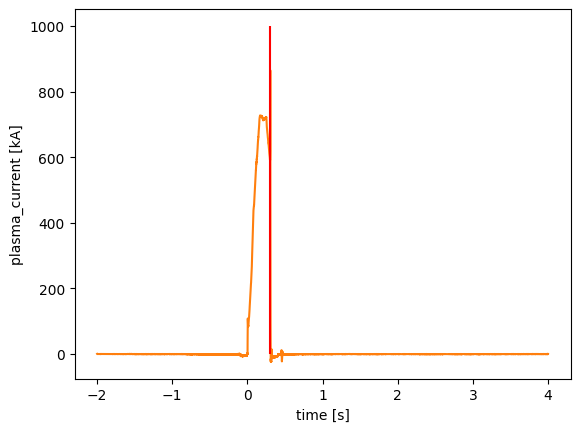

In [58]:
# plot using xarray
plt.plot(1)
amc['plasma_current'].plot()

plt.vlines(cp[0], 0, 1000, color='r')